# Imbalanced generator

make_imbalance turns an original dataset into an imbalanced dataset. This behaviour is driven by the parameter sampling_strategy which behave similarly to other resampling algorithm. sampling_strategy can be given as a dictionary where the key corresponds to the class and the value is the number of samples in the class:

In [3]:
from collections import Counter
from sklearn.datasets import load_iris
from imblearn.datasets import make_imbalance
iris = load_iris()
sampling_strategy = {0: 20, 1: 30, 2: 40}
X_imb, y_imb = make_imbalance(iris.data, iris.target,
                 sampling_strategy=sampling_strategy)
sorted(Counter(y_imb).items())
[(0, 20), (1, 30), (2, 40)]

[(0, 20), (1, 30), (2, 40)]

## Note that all samples of a class are passed-through if the class is not mentioned in the dictionary:

In [6]:
sampling_strategy = {0: 10}
X_imb, y_imb = make_imbalance(iris.data, iris.target,
                               sampling_strategy=sampling_strategy)
sorted(Counter(y_imb).items())
[(0, 10), (1, 50), (2, 50)]

[(0, 10), (1, 50), (2, 50)]

In [7]:
X_imb.shape

(110, 4)

## Instead of a dictionary, a function can be defined and directly pass to sampling_strategy:

In [12]:
def ratio_multiplier(y):
    multiplier = {0: 0.5, 1: 0.7, 2: 0.95}
    target_stats = Counter(y)
    for key, value in target_stats.items():
        target_stats[key] = int(value * multiplier[key])
    return target_stats
    X_imb, y_imb = make_imbalance(iris.data, iris.target,
                               sampling_strategy=ratio_multiplier)
sorted(Counter(y_imb).items())
[(0, 25), (1, 35), (2, 47)]

[(0, 25), (1, 35), (2, 47)]

# make_imbalance function

Automatically created module for IPython interactive environment


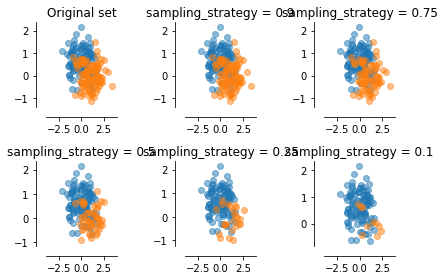

In [14]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons

from imblearn.datasets import make_imbalance

print(__doc__)


def plot_decoration(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-4, 4])


# Generate the dataset
X, y = make_moons(n_samples=200, shuffle=True, noise=0.5, random_state=10)

# Two subplots, unpack the axes array immediately
f, axs = plt.subplots(2, 3)

axs = [a for ax in axs for a in ax]

axs[0].scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
axs[0].scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
axs[0].set_title('Original set')
plot_decoration(axs[0])


def ratio_func(y, multiplier, minority_class):
    target_stats = Counter(y)
    return {minority_class: int(multiplier * target_stats[minority_class])}


multipliers = [0.9, 0.75, 0.5, 0.25, 0.1]
for i, multiplier in enumerate(multipliers, start=1):
    ax = axs[i]

    X_, y_ = make_imbalance(X, y, sampling_strategy=ratio_func,
                            **{"multiplier": multiplier,
                               "minority_class": 1})
    ax.scatter(X_[y_ == 0, 0], X_[y_ == 0, 1], label="Class #0", alpha=0.5)
    ax.scatter(X_[y_ == 1, 0], X_[y_ == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title('sampling_strategy = {}'.format(multiplier))
    plot_decoration(ax)

plt.tight_layout()
plt.show()

# Usage of the sampling_strategy parameter for the different algorithms

This example shows the different usage of the parameter sampling_strategy for the different family of samplers (i.e. over-sampling, under-sampling. or cleaning methods).

In [16]:
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

from imblearn.datasets import make_imbalance

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

print(__doc__)


def plot_pie(y):
    target_stats = Counter(y)
    labels = list(target_stats.keys())
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)
        return my_autopct

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, shadow=True,
           autopct=make_autopct(sizes))
    ax.axis('equal')

Automatically created module for IPython interactive environment


## First, we will create an imbalanced data set from a the iris data set.

Information of the original iris data set: 
 Counter({0: 50, 1: 50, 2: 50})
Information of the iris data set after making it imbalanced using a dict: 
 sampling_strategy={0: 10, 1: 20, 2: 47} 
 y: Counter({2: 47, 1: 20, 0: 10})


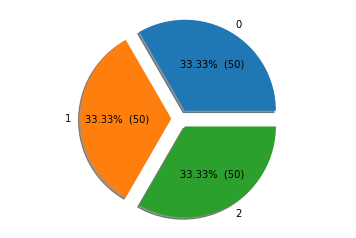

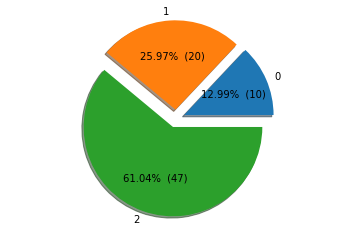

In [17]:
iris = load_iris()

print('Information of the original iris data set: \n {}'.format(
    Counter(iris.target)))
plot_pie(iris.target)

sampling_strategy = {0: 10, 1: 20, 2: 47}
X, y = make_imbalance(iris.data, iris.target,
                      sampling_strategy=sampling_strategy)

print('Information of the iris data set after making it'
      ' imbalanced using a dict: \n sampling_strategy={} \n y: {}'
      .format(sampling_strategy, Counter(y)))
plot_pie(y)

# Using sampling_strategy in resampling algorithms

Information of the iris data set after making it balanced using a float and an under-sampling method: 
 sampling_strategy=0.8 
 y: Counter({2: 12, 0: 10})


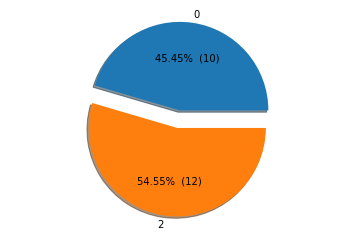

In [18]:
# select only 2 classes since the ratio make sense in this case
binary_mask = np.bitwise_or(y == 0, y == 2)
binary_y = y[binary_mask]
binary_X = X[binary_mask]

sampling_strategy = 0.8

rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(binary_X, binary_y)
print('Information of the iris data set after making it '
      'balanced using a float and an under-sampling method: \n '
      'sampling_strategy={} \n y: {}'
      .format(sampling_strategy, Counter(y_res)))
plot_pie(y_res)